# **STUDENT AI** - CORRELATION ASSESSMENT

## Objectives

Complete a correlation study to assess if any features of the dataset strongly influence the numerical target (Math, Reading, Writing) scores.

## Inputs

Cleaned data set from previous notebook with Mean scores added

## Outputs

Determine which, if any, features to use for model training and prediction


---

# Import required libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.encoding import OneHotEncoder
import ppscore as pps

print('All Libraries Loaded')

All Libraries Loaded


# Change working directory

### Set the working directory to notebook parent folder
If the output does not match, click **'clear all outputs'** and then **'restart'** the notebook. 
Then run cells from top to bottom.

In [2]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('If correct, Active Directory should read: /workspace/student-AI')
print(f"Active Directory: {current_dir}")

If correct, Active Directory should read: /workspace/student-AI
Active Directory: /workspace/student-AI


### Load cleaned dataset and add mean score

In [3]:
df = pd.read_csv(f"outputs/dataset/Expanded_data_with_more_features_clean.csv")
df['MeanScore'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1).round().astype(int)
df['NrSiblings'] = df['NrSiblings'].astype(str)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MeanScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,71,74,72
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,90,88,82
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,93,91,90
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,5 - 10,45,56,42,48
4,male,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,76,78,75,76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30641 non-null  object
 1   EthnicGroup          30641 non-null  object
 2   ParentEduc           30641 non-null  object
 3   LunchType            30641 non-null  object
 4   TestPrep             30641 non-null  object
 5   ParentMaritalStatus  30641 non-null  object
 6   PracticeSport        30641 non-null  object
 7   IsFirstChild         30641 non-null  object
 8   NrSiblings           30641 non-null  object
 9   WklyStudyHours       30641 non-null  object
 10  MathScore            30641 non-null  int64 
 11  ReadingScore         30641 non-null  int64 
 12  WritingScore         30641 non-null  int64 
 13  MeanScore            30641 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 3.3+ MB


# Assess Feature Correlation

I will use Pearson and Spearman tests as well as predictive Power Score Library to assess the dataset and see where correlations can be found, and if they match my hypothesis from the previous notebook. 
Pearson and Spearman require numerical data only, so all categorical variable data has to be encoded as a number.

male = 0, female = 1 etc ....

this can be automatically achieved using the one_hot_encoder function.

In [5]:
encoded_data = OneHotEncoder(variables = df.columns[df.dtypes=='object'].to_list(), drop_last=False)
encoded_data = encoded_data.fit_transform(df)
encoded_data.head()

,MathScore,ReadingScore,WritingScore,MeanScore,Gender_female,Gender_male,EthnicGroup_group C,EthnicGroup_group B,EthnicGroup_group A,EthnicGroup_group D,...,NrSiblings_0,NrSiblings_4,NrSiblings_1,NrSiblings_2,NrSiblings_5,NrSiblings_7,NrSiblings_6,WklyStudyHours_< 5,WklyStudyHours_5 - 10,WklyStudyHours_> 10
0,71,71,74,72,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,69,90,88,82,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,87,93,91,90,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,45,56,42,48,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,76,78,75,76,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


All variable and categorical values have been converted to its own column using the fit.transform method. Creating a much simpler binary option for each value. There are now 34 columns. Now the Pearson algorithm can be applied to calculate the level of correlation with the selected target variable. I will use the mean as it best represents the overall performance of a student.

## General Correlation Table

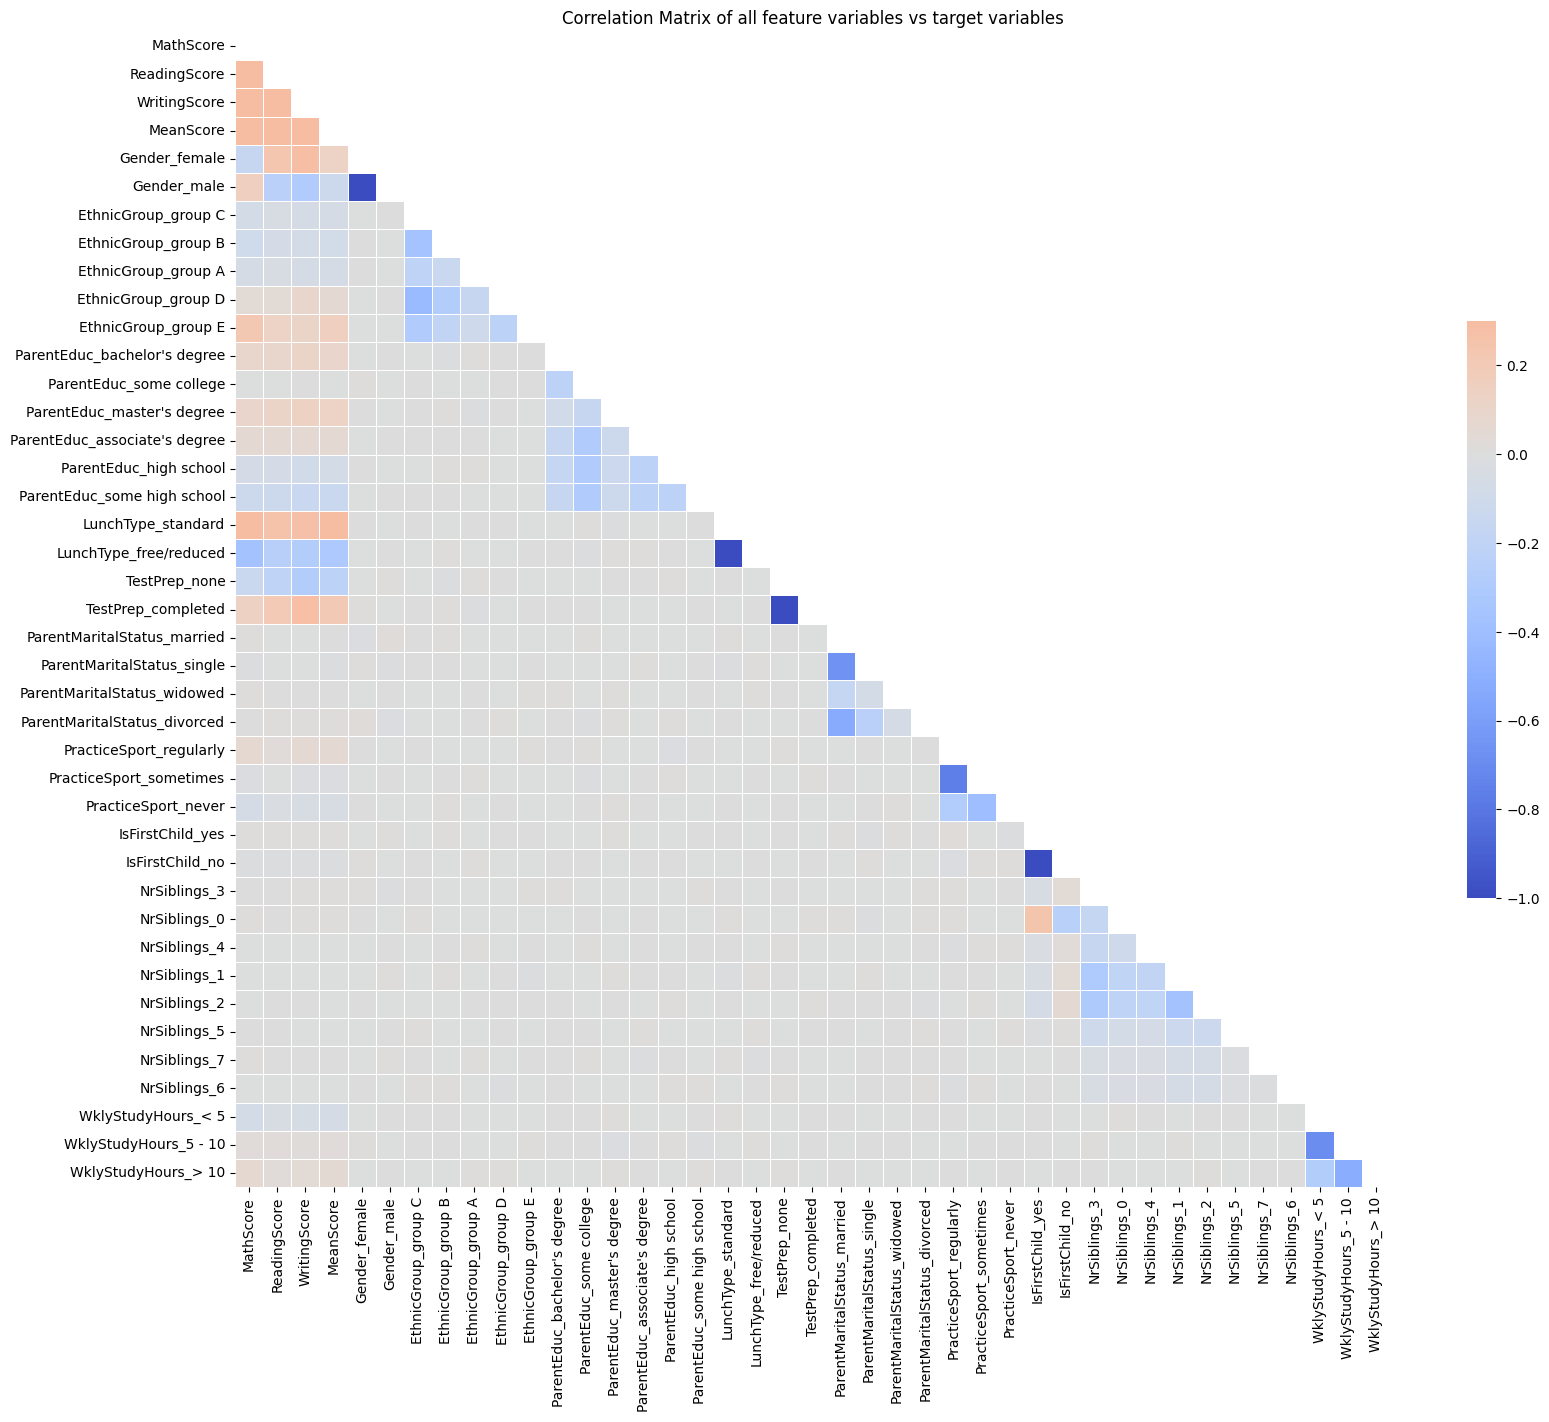

In [6]:
#plot general correlation matrix for whole feature set
corr_matrix = encoded_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 15))
# Plot the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
plt.title('Correlation Matrix of all feature variables vs target variables')
plt.show()

### Assessing the large correlation table.
By removing the top half of the plot (opposite correlation relationship which is redundant) and removing values of 1 (feature correlating with itself) the result is a rather large table with ALL catagorical options laid out.
Binary features are still perfectly negatively correlated (-1) -- this means that if gender is male, I cannot be female. or a student I either a fist child or not.<br>
The intersting part of the correlation table are light orange values or even blue shaded ones that are not numerical variables, indicating some correlation with the target variable.<br>
I will conduct an individual analysis to assess teh correlation levels for each categorical feature below:

## Calculate Pearson Correlation Table

In [7]:
correlation_pearson = encoded_data.corr(method='pearson')['MeanScore'].sort_values(key=abs, ascending=False).head(10)
correlation_pearson

MeanScore                      1.000000
ReadingScore                   0.969200
WritingScore                   0.966114
MathScore                      0.919876
LunchType_standard             0.315839
LunchType_free/reduced        -0.315839
TestPrep_none                 -0.218126
TestPrep_completed             0.218126
EthnicGroup_group E            0.160630
ParentEduc_some high school   -0.136453
Name: MeanScore, dtype: float64

The top 10 correlation Features are listed. The pearson test also lists the correlation between other numerical variables and of course each score directly correlates to the mean score, as does the mean score perfectly correlate with itself. 
**Therefore I only consider the 5th value onwards for investigating correlation...**

In [8]:
correlation_pearson = encoded_data.corr(method='pearson')['MeanScore'].sort_values(key=abs, ascending=False)[4:].head(10)
correlation_pearson

LunchType_standard              0.315839
LunchType_free/reduced         -0.315839
TestPrep_none                  -0.218126
TestPrep_completed              0.218126
EthnicGroup_group E             0.160630
ParentEduc_some high school    -0.136453
Gender_female                   0.126188
Gender_male                    -0.126188
ParentEduc_master's degree      0.123639
ParentEduc_bachelor's degree    0.101549
Name: MeanScore, dtype: float64

## Calculate Spearman correlation table
I also investigate the spearman correlation calculation and list the top features without the numercial variables

In [9]:
correlation_spearman = encoded_data.corr(method='spearman')['MeanScore'].sort_values(key=abs, ascending=False)[5:].head(10)
correlation_spearman

LunchType_free/reduced         -0.308989
TestPrep_none                  -0.213853
TestPrep_completed              0.213853
EthnicGroup_group E             0.158113
ParentEduc_some high school    -0.132208
Gender_male                    -0.124251
Gender_female                   0.124251
ParentEduc_master's degree      0.121891
ParentEduc_bachelor's degree    0.098894
EthnicGroup_group B            -0.082000
Name: MeanScore, dtype: float64

### Individual Score analysis.

It shows that Pearson is able to determine slightly higher correlations on the mean target variable. Using this same method on idnvidual scores might show minor details in the overall correlation. For instance it is possible that gender will have a higher correlation specifically for the maths scores...

In [10]:
correlation_pearson_maths = encoded_data.corr(method='pearson')['MathScore'].sort_values(key=abs, ascending=False)[4:].head(10)
correlation_pearson_maths

LunchType_free/reduced        -0.367942
LunchType_standard             0.367942
EthnicGroup_group E            0.221775
Gender_male                    0.162391
Gender_female                 -0.162391
TestPrep_none                 -0.134949
TestPrep_completed             0.134949
ParentEduc_some high school   -0.121240
ParentEduc_master's degree     0.100001
EthnicGroup_group B           -0.096779
Name: MathScore, dtype: float64

In [11]:
correlation_pearson_reading = encoded_data.corr(method='pearson')['ReadingScore'].sort_values(key=abs, ascending=False)[4:].head(10)
correlation_pearson_reading

LunchType_standard              0.258152
LunchType_free/reduced         -0.258152
Gender_male                    -0.237097
Gender_female                   0.237097
TestPrep_none                  -0.204724
TestPrep_completed              0.204724
EthnicGroup_group E             0.128716
ParentEduc_some high school    -0.122773
ParentEduc_master's degree      0.116293
ParentEduc_bachelor's degree    0.087993
Name: ReadingScore, dtype: float64

In [12]:
correlation_pearson_writing = encoded_data.corr(method='pearson')['MathScore'].sort_values(key=abs, ascending=False)[4:].head(10)
correlation_pearson_writing

LunchType_free/reduced        -0.367942
LunchType_standard             0.367942
EthnicGroup_group E            0.221775
Gender_male                    0.162391
Gender_female                 -0.162391
TestPrep_none                 -0.134949
TestPrep_completed             0.134949
ParentEduc_some high school   -0.121240
ParentEduc_master's degree     0.100001
EthnicGroup_group B           -0.096779
Name: MathScore, dtype: float64

## Correlation Conclusions

Since a perfect correlation for both tests is represented by a value of 1.0, we can see that the categorical features only have a relatively weak correlation with a best value of 0.315 for the LunchType Feature of the pearson test.

However, the test does align with my previous hypothesis that LunchType, EthnicGroup, Parental Education, TestPrep and Gender are most likey to influence the numerical target variables.

the individual score evaluations all agree on lunchtype being teh most significant indicator. Interestingly, the Specific Maths score showed a lower correlation of gender, against my initial hypothesis.

## PPS Correlation

to prevent the numerical variables from being considered against each other, I will drop them so that only one target variable remains before the prediction.

In [13]:
df_mean = df.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)

pps_correlation = pps.matrix(df=df_mean)
pps_correlation

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Gender,Gender,1.0,predict_itself,True,None,0.0000,1.000000,None
1,Gender,EthnicGroup,0.0,classification,True,weighted F1,0.2468,0.195202,DecisionTreeClassifier()
2,Gender,ParentEduc,0.0,classification,True,weighted F1,0.2008,0.128795,DecisionTreeClassifier()
3,Gender,LunchType,0.0,classification,True,weighted F1,0.5392,0.513640,DecisionTreeClassifier()
4,Gender,TestPrep,0.0,classification,True,weighted F1,0.5564,0.543773,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
116,MeanScore,PracticeSport,0.0,classification,True,weighted F1,0.3992,0.393912,DecisionTreeClassifier()
117,MeanScore,IsFirstChild,0.0,classification,True,weighted F1,0.5412,0.521804,DecisionTreeClassifier()
118,MeanScore,NrSiblings,0.0,classification,True,weighted F1,0.2146,0.199136,DecisionTreeClassifier()
119,MeanScore,WklyStudyHours,0.0,classification,True,weighted F1,0.4142,0.403903,DecisionTreeClassifier()


### Filter pps results for mean score correlation...

In [14]:
# also remove PPS = 1 as the is meaningless (correlates with itself)
df_mean_pps_filtered = pps_correlation.filter(['x', 'y', 'ppscore']).query('x == "MeanScore" & ppscore != 1').sort_values(by='ppscore', ascending=False)
df_mean_pps_filtered

,x,y,ppscore
113,MeanScore,LunchType,0.220754
114,MeanScore,TestPrep,0.133310
110,MeanScore,Gender,0.047392
111,MeanScore,EthnicGroup,0.011235
115,MeanScore,ParentMaritalStatus,0.002409
112,MeanScore,ParentEduc,0.000000
116,MeanScore,PracticeSport,0.000000
117,MeanScore,IsFirstChild,0.000000
118,MeanScore,NrSiblings,0.000000
119,MeanScore,WklyStudyHours,0.000000


### Interpretation:

according to this github discussion on the pps.matrix scores, found [here](https://github.com/8080labs/ppscore/issues/39)


> The interpretation depends on the context:<br><br>
In general, it is hard to denote some specific levels and give some interpretation for them without knowing the context. For example if many columns have a PPS of 0.3 then a PPS of 0.2 might actually be not that good. <br>
> However, when no column has a PPS >0.01 then a PPS of 0.1 might be very good - especially when trying to predict something that is hard like stock prices.<br>
> Nevertheless, there are some levels that are often helpful during everyday life:
>
> * PPS == 0 means that there is no predictive power
> * PPS < 0.2 often means that there is some relevant predictive power but it is weak
> * PPS > 0.2 often means that there is strong predictive power
> * PPS > 0.8 often means that there is a deterministic relationship in the data, for example y = 3*x or there is some underlying if...else... logic

<br>
<br>
Using this feedback as a guideline, since most features have a value <0.05, only LunchType and TestTrep seem to show any predictive correlation to the MeanScore with LunchType showing a strong correlation of >0.2 and TestPrep slightly less.

Once again, I'll check on the individual score target variables to see if there is a significant difference.

In [15]:
# filter an query pps results for one score type only and remove correlation with itself (pps=1)
df_maths = df.drop(['MeanScore', 'ReadingScore', 'WritingScore'], axis=1)
pps_correlation = pps.matrix(df=df_maths)
pps_correlation.filter(['x', 'y', 'ppscore']).query('x == "MathScore" & ppscore != 1').sort_values(by='ppscore', ascending=False)


,x,y,ppscore
113,MathScore,LunchType,0.275114
110,MathScore,Gender,0.057117
116,MathScore,PracticeSport,0.027162
115,MathScore,ParentMaritalStatus,0.015978
111,MathScore,EthnicGroup,0.003337
114,MathScore,TestPrep,0.001661
112,MathScore,ParentEduc,0.000000
117,MathScore,IsFirstChild,0.000000
118,MathScore,NrSiblings,0.000000
119,MathScore,WklyStudyHours,0.000000


In [16]:
# filter an query pps results for one score type only and remove correlation with itself (pps=1)
df_reading = df.drop(['MathScore', 'MeanScore', 'WritingScore'], axis=1)
pps_correlation = pps.matrix(df=df_reading)
pps_correlation.filter(['x', 'y', 'ppscore']).query('x == "ReadingScore" & ppscore != 1').sort_values(by='ppscore', ascending=False)

,x,y,ppscore
113,ReadingScore,LunchType,0.175898
110,ReadingScore,Gender,0.119983
114,ReadingScore,TestPrep,0.102453
115,ReadingScore,ParentMaritalStatus,0.008738
111,ReadingScore,EthnicGroup,0.006241
112,ReadingScore,ParentEduc,0.000000
116,ReadingScore,PracticeSport,0.000000
117,ReadingScore,IsFirstChild,0.000000
118,ReadingScore,NrSiblings,0.000000
119,ReadingScore,WklyStudyHours,0.000000


In [17]:
# filter an query pps results for one score type only and remove correlation with itself (pps=1)
df_writing = df.drop(['MathScore', 'ReadingScore', 'MeanScore'], axis=1)
pps_correlation = pps.matrix(df=df_writing)
pps_correlation.filter(['x', 'y', 'ppscore']).query('x == "WritingScore" & ppscore != 1').sort_values(by='ppscore', ascending=False)

,x,y,ppscore
113,WritingScore,LunchType,0.193597
110,WritingScore,Gender,0.176249
114,WritingScore,TestPrep,0.161458
115,WritingScore,ParentMaritalStatus,0.010824
111,WritingScore,EthnicGroup,0.007400
116,WritingScore,PracticeSport,0.004576
118,WritingScore,NrSiblings,0.004467
112,WritingScore,ParentEduc,0.000000
117,WritingScore,IsFirstChild,0.000000
119,WritingScore,WklyStudyHours,0.000000


## Individual Score Conclusions
on all individual scores, LunchType remains a strong predictor of student performance, albeit Maths having a significantly larger impact then reading and writing, which individually fall below the 0.2 theshold. For writing, Gender and TestPrep have an increasing significance, so for modelling purposes, they should remain part of the training features we fit the model on.